# [Python Reference Link](http://www.data8.org/sp20/python-reference.html)
*Run the cell below so that we can set our modules up*# Importing our modules

In [1]:
import numpy as np
from datascience import *
import math as m

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
births = Table.read_table('baby.csv')
#births

# Mean vs. Median

#### Calculating the mean and the median

In [3]:
sample_data = make_array(2,3,3,9)
print('sample data:',sample_data)
print('mean/average:',np.mean(sample_data))
print('median:',np.median(sample_data))

sample data: [2 3 3 9]
mean/average: 4.25
median: 3.0


#### Visualizing the concept of the mean acting as the 'Center of Gravity

Text(0.5, 1.0, 'Average as a "Center of Gravity"')

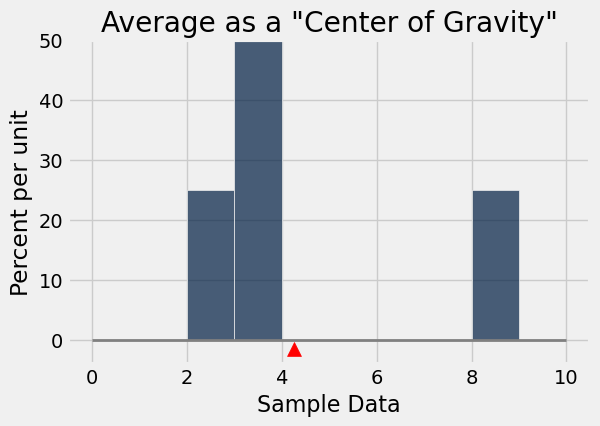

In [4]:
Table().with_column('Sample Data', sample_data).hist(bins=np.arange(0,10,1))
plt.ylim(-0.04,0.5)
plt.plot([0,10],[0,0],color='grey',lw=2)
plt.scatter(np.mean(sample_data),-0.015,marker='^',color='red',s=100)
plt.title('Average as a "Center of Gravity"')

#### A histogram of a Symmetric Distribution (more specifically, a Normal Distribution; Bell-Shaped Curve)

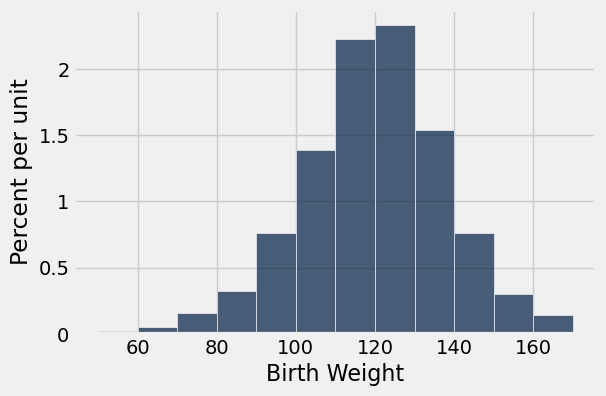

In [5]:
weight_bins = np.arange(50,180,10)
births.hist("Birth Weight",bins=weight_bins)

#### A Histogram of a Right-Skewed Distribution

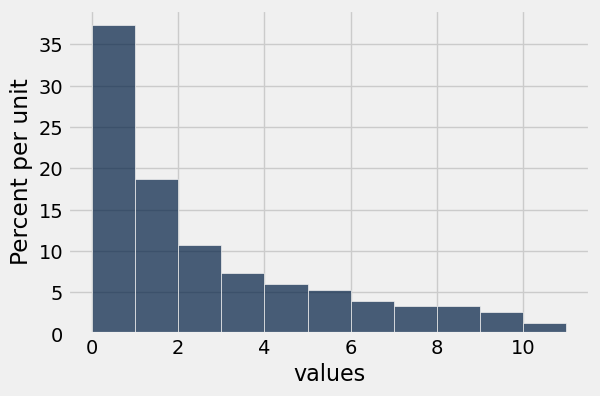

In [6]:
input_values = np.arange(0,15,0.1)
exponential_curve = 0.25*m.e**(0.25*input_values)

r_skew_bins = np.arange(0,12,1)
Table().with_columns('values',exponential_curve).hist(bins=r_skew_bins)

#### A Histogram of a Left-Skewed Distribution

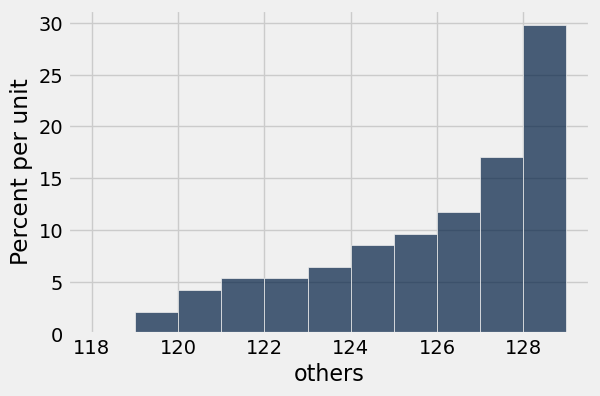

In [7]:
reverse_exponential = 130 - exponential_curve

l_skew_bins = np.arange(118,130,1)
Table().with_columns('others',reverse_exponential).hist(bins = l_skew_bins)

## Let's look at the relationship between the Mean and the Median between these different distribution types

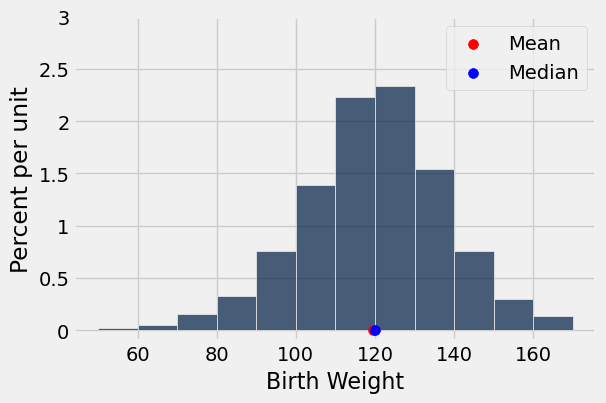

In [8]:
births.hist("Birth Weight",bins=weight_bins)
plt.scatter(np.mean(births.column('Birth Weight')), 0, color='red', zorder=2, s=50, label="Mean")
plt.scatter(np.median(births.column('Birth Weight')), 0, color='blue', zorder=2, s=50, label="Median")
plt.legend()
plt.ylim(-0.001, 0.03); 

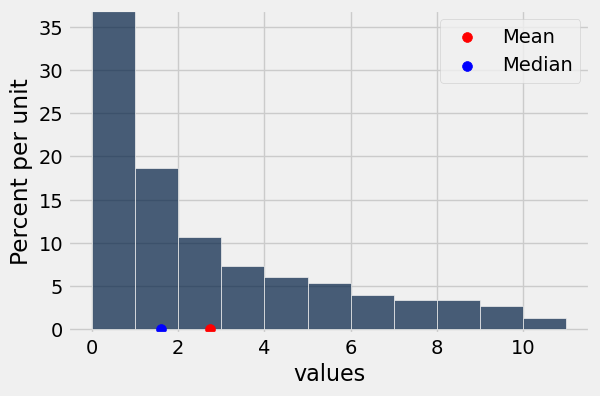

In [9]:
Table().with_columns('values',exponential_curve).hist(bins=r_skew_bins)
plt.scatter(np.mean(exponential_curve), 0, color='red', zorder=2, s=50, label="Mean")
plt.scatter(np.median(exponential_curve), 0, color='blue', zorder=2, s=50, label="Median")
plt.legend()
plt.ylim(-0.005, 0.37);

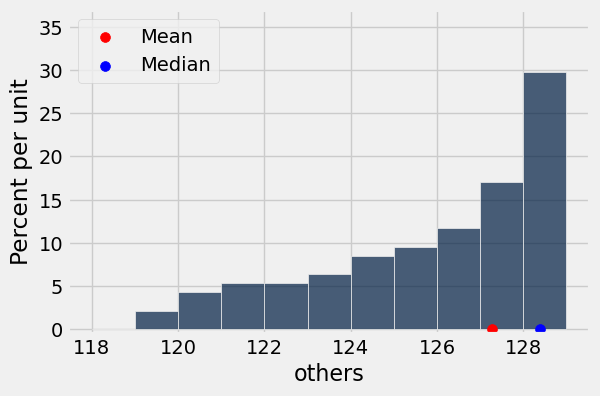

In [10]:
Table().with_columns('others',reverse_exponential).hist(bins = l_skew_bins)
plt.scatter(np.mean(reverse_exponential), 0, color='red', zorder=2, s=50, label="Mean")
plt.scatter(np.median(reverse_exponential), 0, color='blue', zorder=2, s=50, label="Median")
plt.legend()
plt.ylim(-0.005, 0.37);

# Quantifying Variability i.e. Standard Deviation

In [11]:
#since we are computing a formula, we will use some methods from the math module
import math as m

In [12]:
birth_weights = births.column('Birth Weight')
print('mean:',np.mean(birth_weights))
print('birth weights:',birth_weights)

mean: 119.462521295
birth weights: [120 113 128 ..., 130 125 117]


### Root Mean Square of "***Deviations from Average***"
We first want to measure the deviations from average (i.e. look at how far away each data point is from the mean/average)

In [13]:
deviations = birth_weights - np.mean(birth_weights)
print(birth_weights)
print(deviations)

[120 113 128 ..., 130 125 117]
[  0.53747871  -6.46252129   8.53747871 ...,  10.53747871   5.53747871
  -2.46252129]


### Root Mean "***Square***" of Deviations from Average
An effort to turn all the values positive by squaring each deviation from average

In [14]:
square_deviations = deviations**2
square_deviations

array([   0.28888336,   41.76418148,   72.88854264, ...,  111.03845746,
         30.66367041,    6.06401113])

### Root "***Mean***" Square of Deviations from Average
Now we compute the mean/average of the square deviations from above

In [15]:
np.mean(square_deviations)

335.65404679469134

### "***Root***" Mean Square of Deviations from Average
Since we squared the deviations above, we are going to undo that by taking the square root. 

In [16]:
m.sqrt(np.mean(square_deviations))

18.32086370220278

In [17]:
np.std(birth_weights)

18.320863702202779

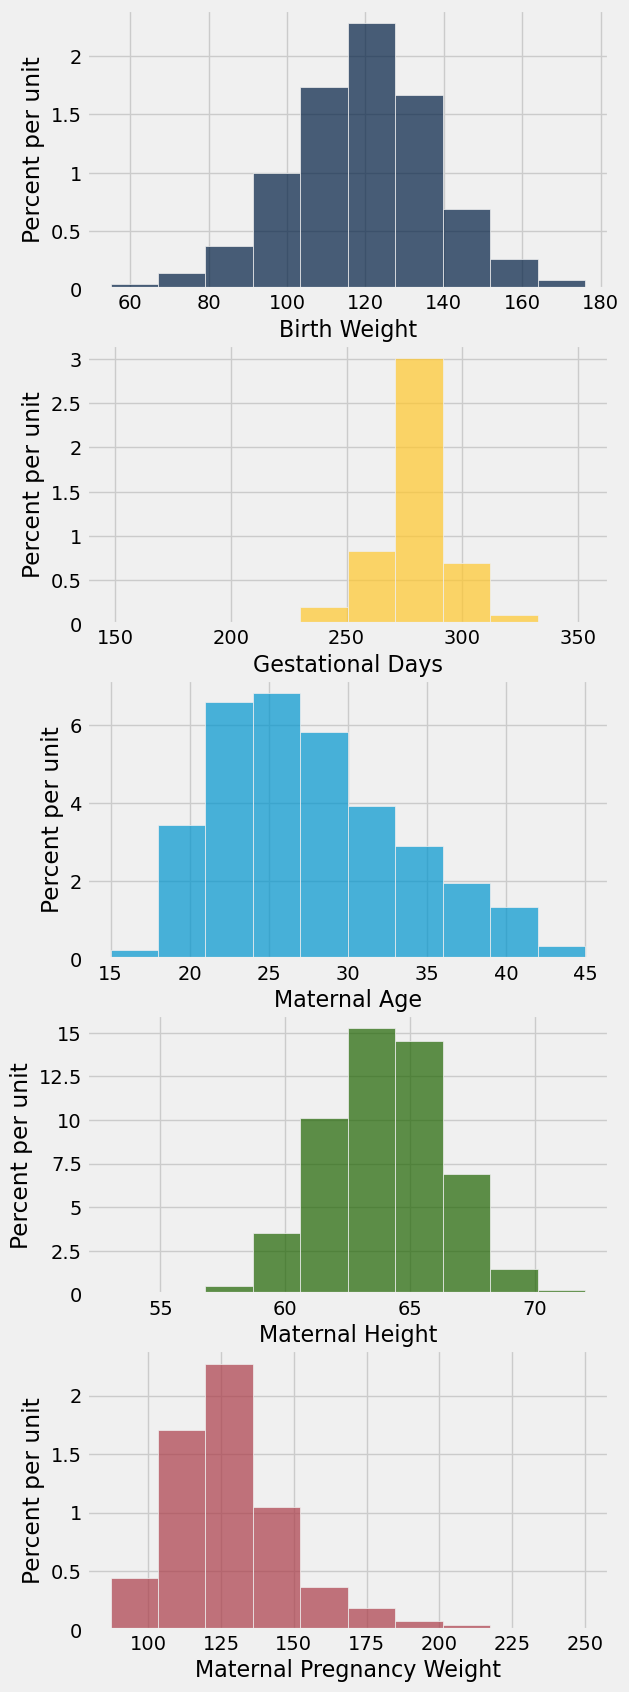

In [18]:
births.drop(5).hist(overlay=False)